<a href="https://colab.research.google.com/github/MarziehHashemzadehSaadat/final-project/blob/main/INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Classification with PyCaret

**Install** **Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/MarziehHashemzadehSaadat/final-project/main/Book1.csv')
df.head(25)

A          B         C         D         E          F          G  \
0   115.148438  51.383377  0.082812 -0.569281  1.648829  11.334623  12.673800   
1   104.500000  46.781407  0.610511  0.665677  1.959030  13.704325  10.428528   
2   135.078125  48.686595  0.113358 -0.147732  2.354515  17.243720   9.291449   
3   125.679688  48.037897  0.014871 -0.043867  5.914716  27.298353   5.190414   
4   119.195312  51.928144  0.047141 -0.686541  9.627926  38.893146   4.072053   
5   116.625000  52.407657  0.119323 -0.147561  3.747492  20.400828   6.610455   
6   128.820312  42.981179 -0.251582  0.430921  2.424749  14.262067   9.224601   
7    98.390625  38.090606  0.181847  1.328353  2.646321  15.262458   8.322597   
8   109.343750  32.771567  0.275442  2.679993  3.254181  21.394736   7.802423   
9   122.421875  42.550083  0.196809  0.272008  2.216555  13.980125   9.518078   
10   94.210938  37.199557  0.473575  1.919947  2.740803  21.107815   8.834994   
11  128.695312  61.484825 -0.021452 -0.645660  0.893813  11.439294  15.335643   
12  110.304688  40.893451  0.062789  0.462445  4.395485  23.004361   6.869968   
13  101.195312  40.438622  0.436344  1.043268  2.738294  18.785693   8.464980   
14   78.578125  35.773945  0.890442  3.463752  1.952341  13.993915  10.253332   
15  131.828125  56.345628 -0.036378 -0.522554  4.956522  26.149713   5.711101   
16  133.312500  59.118888 -0.085394 -0.749533  2.529264  21.703690   8.942403   
17  131.273438  50.455382  0.024921  0.195920  1.496656  15.696244  11.971549   
18  117.242188  44.905760  0.187123  0.250451  1.759197  12.032379  12.143039   
19  112.367188  52.949397  0.087103 -0.160979  4.627926  21.416350   5.797639   
20  110.101562  48.708771  0.518679  0.343425  1.065217  12.334283  14.141409   
21  121.007812  36.526638  0.147047  1.174059  2.890468  19.474764   8.198444   
22  135.468750  47.366909  0.111351 -0.055069  4.212375  25.058461   6.854450   
23  104.578125  54.358850  0.252296 -0.319442  3.532609  18.517363   7.170143   
24  110.945312  41.324045  0.236397  0.678847  1.498328  13.391925  11.797374   

             H  class  
0   229.543029      0  
1   139.671367      0  
2   100.291910      0  
3    29.334389      0  
4    15.598908      0  
5    49.708670      0  
6   114.010028      0  
7    90.983960      0  
8    65.061099      0  
9   120.517992      0  
10   80.835277      0  
11  269.573002      0  
12   53.538433      0  
13   82.994641      0  
14  132.544789      0  
15   34.028721      0  
16   81.852690      0  
17  156.126088      0  
18  198.909211      0  
19   40.055821      0  
20  230.387192      0  
21   76.728799      0  
22   49.369713      0  
23   63.898811      0  
24  165.370702      0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       110 non-null    float64
 1   B       110 non-null    float64
 2   C       110 non-null    float64
 3   D       110 non-null    float64
 4   E       110 non-null    float64
 5   F       110 non-null    float64
 6   G       110 non-null    float64
 7   H       110 non-null    float64
 8   class   110 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 7.9 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data** **Analysis** **bold text**

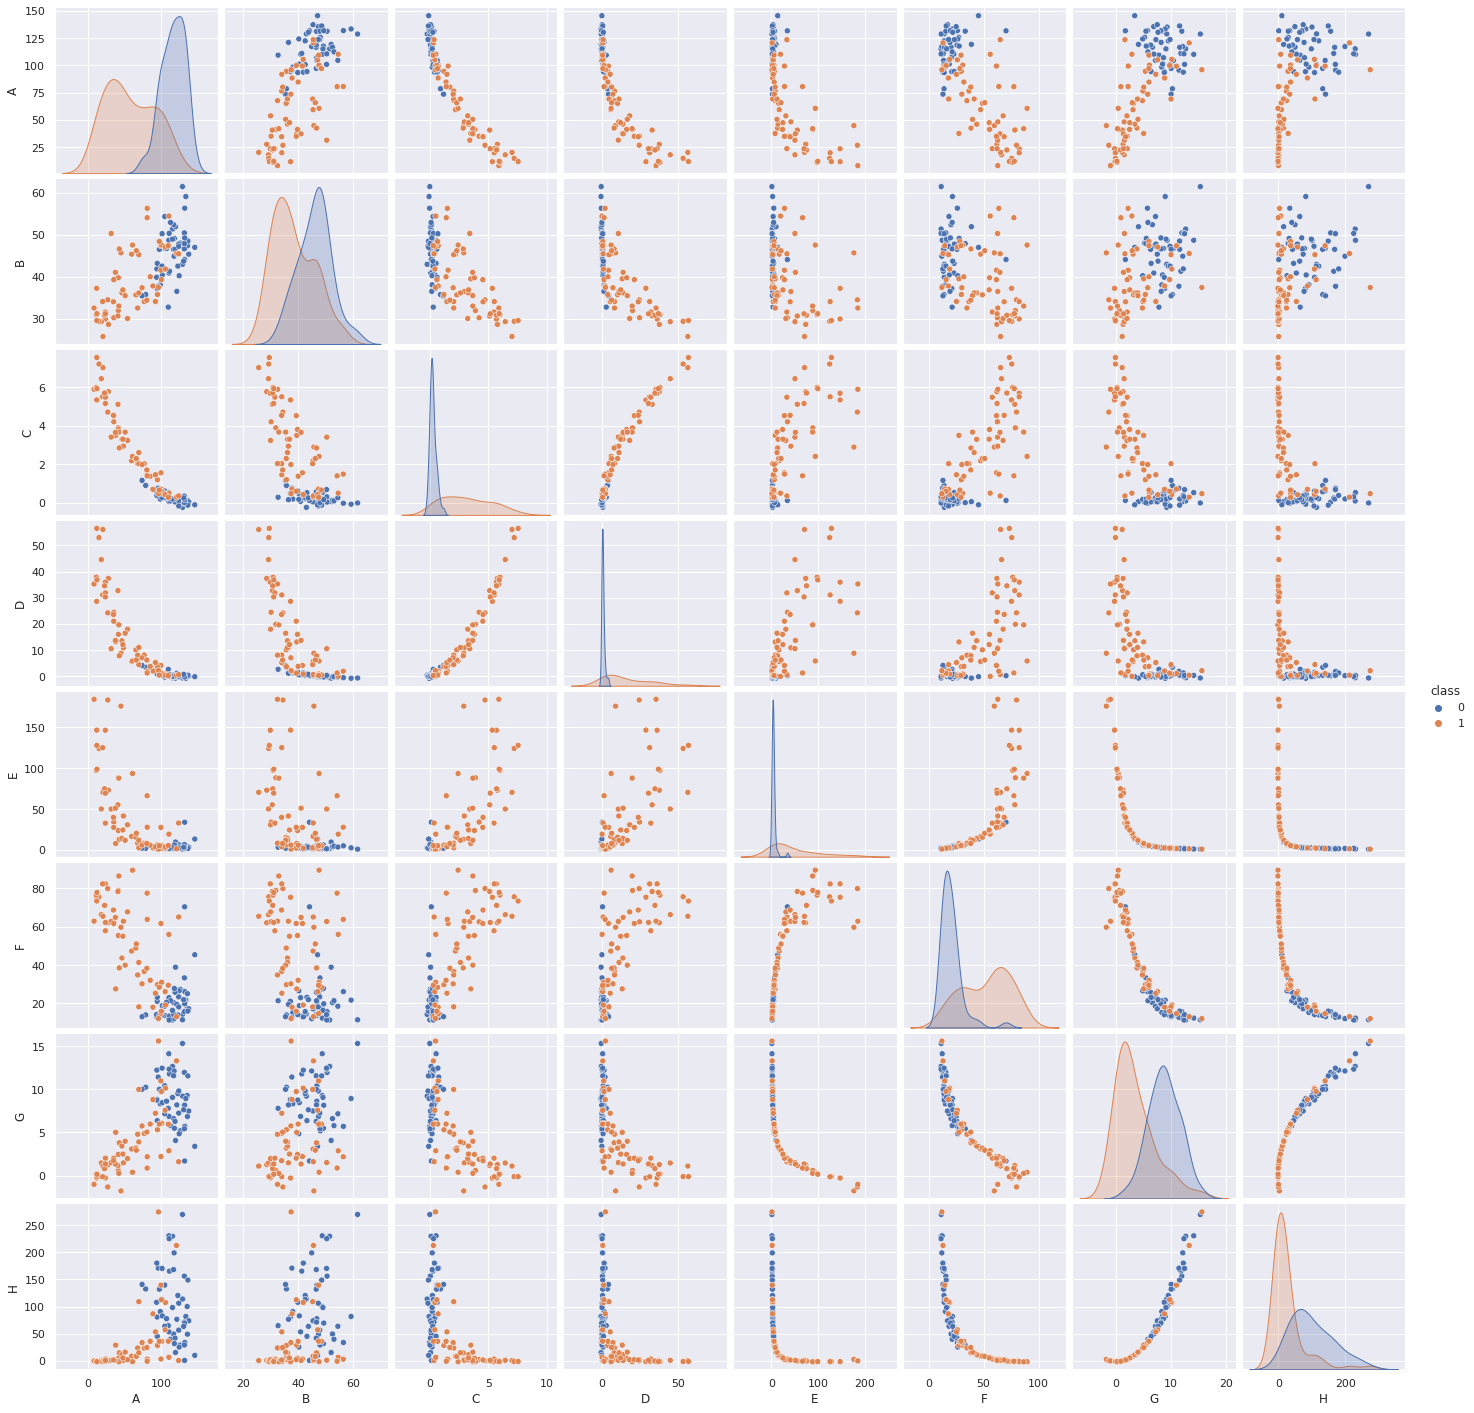

In [10]:
sns.pairplot(df, hue='class')
plt.show()

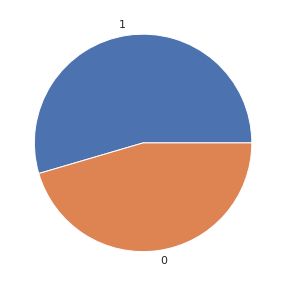

In [11]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['class'])
X.head(10)

A          B         C         D         E          F          G  \
0  115.148438  51.383377  0.082812 -0.569281  1.648829  11.334623  12.673800   
1  104.500000  46.781407  0.610511  0.665677  1.959030  13.704325  10.428528   
2  135.078125  48.686595  0.113358 -0.147732  2.354515  17.243720   9.291449   
3  125.679688  48.037897  0.014871 -0.043867  5.914716  27.298353   5.190414   
4  119.195312  51.928144  0.047141 -0.686541  9.627926  38.893146   4.072053   
5  116.625000  52.407657  0.119323 -0.147561  3.747492  20.400828   6.610455   
6  128.820312  42.981179 -0.251582  0.430921  2.424749  14.262067   9.224601   
7   98.390625  38.090606  0.181847  1.328353  2.646321  15.262458   8.322597   
8  109.343750  32.771567  0.275442  2.679993  3.254181  21.394736   7.802423   
9  122.421875  42.550083  0.196809  0.272008  2.216555  13.980125   9.518078   

            H  
0  229.543029  
1  139.671367  
2  100.291910  
3   29.334389  
4   15.598908  
5   49.708670  
6  114.010028  
7   90.983960  
8   65.061099  
9  120.517992

In [13]:
X.describe().transpose()

count       mean        std        min        25%        50%         75%  \
A  110.0  83.993040  39.202077   8.226562  46.500000  95.808594  116.605469   
B  110.0  41.798315   7.751395  25.771711  35.716165  41.862420   47.411737   
C  110.0   1.809851   2.109912  -0.251582   0.185443   0.629868    3.278911   
D  110.0   8.954072  13.767989  -0.749533   0.302962   1.423450   11.855382   
E  110.0  27.152075  43.151868   0.893813   2.484741   5.533445   32.253972   
F  110.0  37.814244  23.676102  11.313063  17.439778  27.688100   61.982419   
G  110.0   5.823737   4.230623  -1.785377   1.983455   5.778119    9.043148   
H  110.0  60.171909  68.477697  -1.504341   2.664328  35.088348   99.813484   

          max  
A  145.437500  
B   61.484825  
C    7.550922  
D   56.537747  
E  184.525920  
F   89.542258  
G   15.619247  
H  274.319081

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

A         B         C         D         E         F         G  \
0  0.798376  1.242219 -0.822282 -0.694868 -0.593716 -1.123530  1.626572   
1  0.525503  0.645806 -0.571033 -0.604760 -0.586495 -1.022984  1.093424   
2  1.309086  0.892717 -0.807739 -0.664110 -0.577288 -0.872807  0.823421   
3  1.068245  0.808647 -0.854631 -0.656532 -0.494406 -0.446189 -0.150385   
4  0.902079  1.312820 -0.839266 -0.703424 -0.407963  0.045778 -0.415944   
5  0.836213  1.374965 -0.804899 -0.664098 -0.544859 -0.738851  0.186809   
6  1.148726  0.153299 -0.981495 -0.621889 -0.575653 -0.999319  0.807547   
7  0.368947 -0.480517 -0.775130 -0.556408 -0.570495 -0.956872  0.593363   
8  0.649627 -1.169862 -0.730567 -0.457786 -0.556344 -0.696680  0.469846   
9  0.984762  0.097429 -0.768006 -0.633484 -0.580500 -1.011281  0.877235   

          H  
0  2.484696  
1  1.166267  
2  0.588566  
3 -0.452390  
4 -0.653892  
5 -0.153497  
6  0.789812  
7  0.452017  
8  0.071725  
9  0.885285

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
A  110.0 -2.018587e-18  1.004577 -1.941561 -0.960782  0.302781  0.835713   
B  110.0  8.256022e-16  1.004577 -2.077039 -0.788243  0.008308  0.727497   
C  110.0  1.715799e-17  1.004577 -0.981495 -0.773417 -0.561817  0.699452   
D  110.0 -7.065056e-18  1.004577 -0.708020 -0.631225 -0.549469  0.211693   
E  110.0  6.863197e-17  1.004577 -0.611293 -0.574256 -0.503282  0.118772   
F  110.0 -2.134656e-16  1.004577 -1.124445 -0.864488 -0.429652  1.025455   
G  110.0 -2.241263e-16  1.004577 -1.806811 -0.911889 -0.010832  0.764461   
H  110.0 -1.347407e-16  1.004577 -0.904799 -0.843644 -0.367979  0.581547   

        max  
A  1.574551  
B  2.551361  
C  2.733453  
D  3.471927  
E  3.663667  
F  2.194819  
G  2.325979  
H  3.141567

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

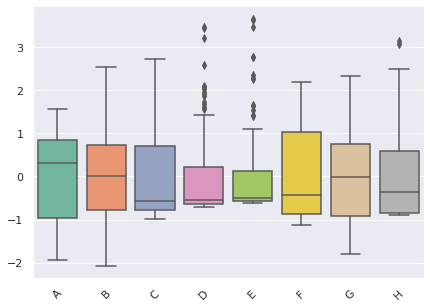

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

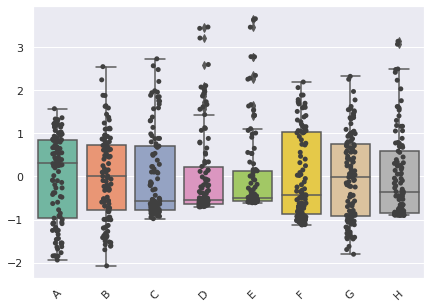

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

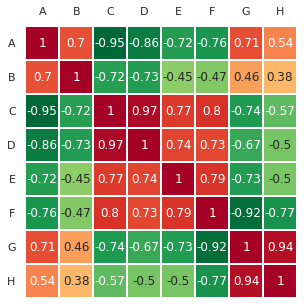

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

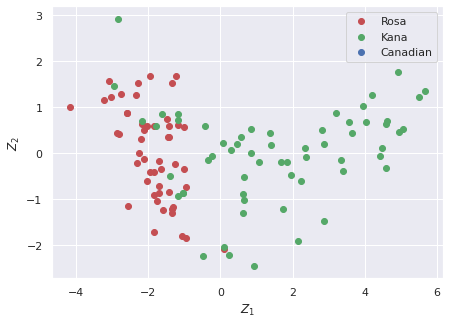

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.37389615, -0.23691074, -0.04792486,  0.41973198,  0.67876383,
        -0.19273317,  0.05719544, -0.3527967 ],
       [-0.28812559, -0.49490412,  0.58658837, -0.55029167,  0.10378746,
         0.11202031, -0.01758582,  0.0389496 ],
       [ 0.39016084,  0.23285068,  0.08162613, -0.35518158,  0.11296369,
         0.03761897,  0.01745619, -0.80390149],
       [ 0.37106061,  0.3076654 ,  0.08128474, -0.21362575,  0.70157219,
         0.02541945,  0.00545834,  0.47173444],
       [ 0.34215476, -0.03270672,  0.63328933,  0.58632619, -0.05044145,
         0.3348795 , -0.14582734, -0.03274719],
       [ 0.37421186, -0.27305507,  0.14293219,  0.02627621, -0.08749929,
        -0.83606032, -0.23503488,  0.04890791],
       [-0.36754554,  0.42083997,  0.11152645, -0.05282476,  0.01624532,
        -0.05895822, -0.81684303, -0.04003592],
       [-0.30835003,  0.54528039,  0.45433922,  0.04421459, -0.114364  ,
        -0.36555002,  0.50233989,  0.01261708]])

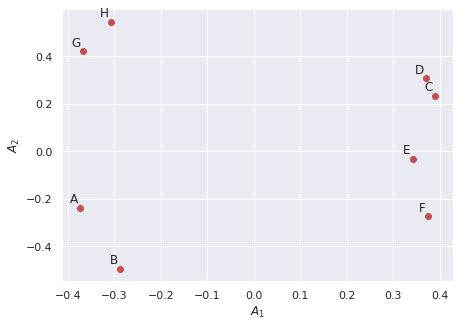

In [22]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


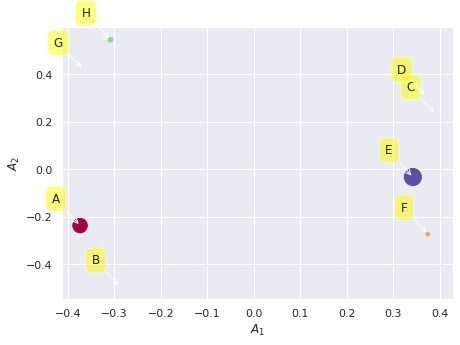

In [23]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([6.00358066e+00, 1.04271744e+00, 5.27504868e-01, 2.34356227e-01,
       1.38818576e-01, 1.11908835e-01, 8.73821232e-03, 5.76967665e-03])

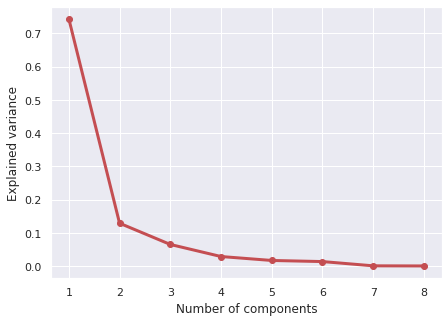

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

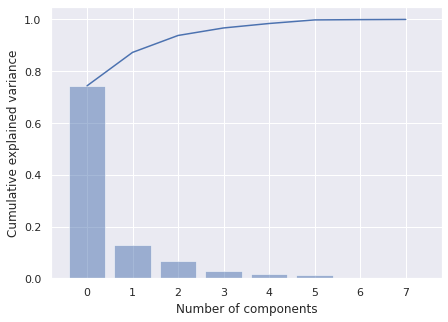

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

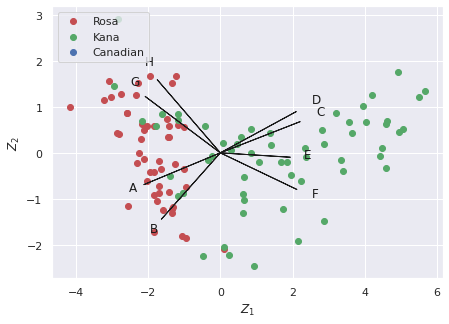

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

**Using PCA Library**

In [28]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=28d2c644af04a93ef96d19caff92c4d8956f3da957c8f7feed4ae81f236da9f5
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=6e1d5f0fdd0de45d465b44878eba619a81d1782673040770719cd99779f968cd
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3       PC4
0   -3.222662  1.156408  1.340525 -0.261675
1   -2.174740  0.631474  0.392057 -0.179750
2   -2.316515 -0.219685  0.209904  0.108088
3   -1.350826 -1.226238 -0.299167  0.133521
4   -1.071953 -1.806032  0.005877 -0.140377
..        ...       ...       ...       ...
105  4.582529  0.621618  0.351367 -0.093520
106  0.299298  0.070438 -1.114371  0.269513
107  2.880756  0.185812 -0.458549 -0.446130
108  0.938768 -2.455451  1.158747 -0.120909
109 -1.184203 -0.940799 -0.241564 -0.058021

[110 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d0340f670>)

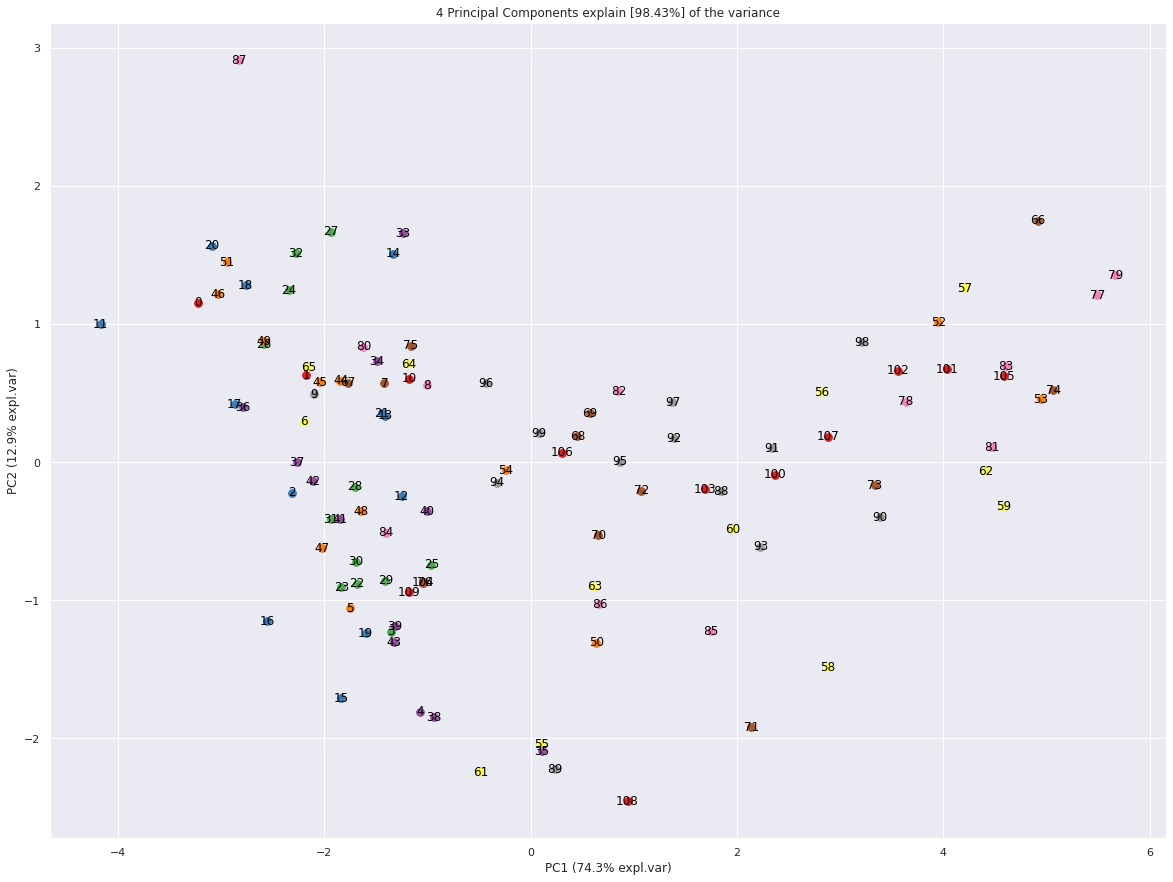

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T

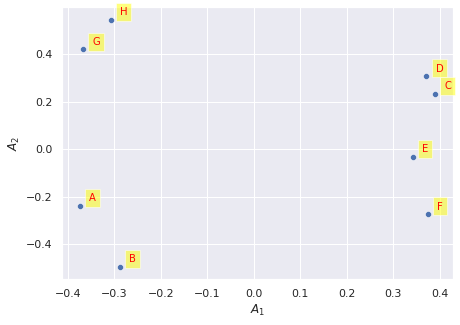

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

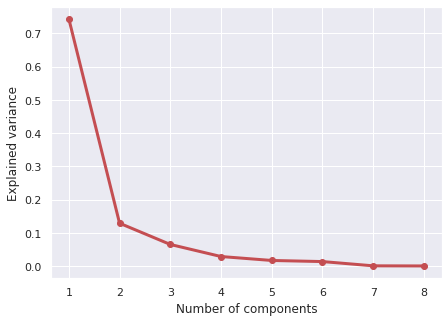

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

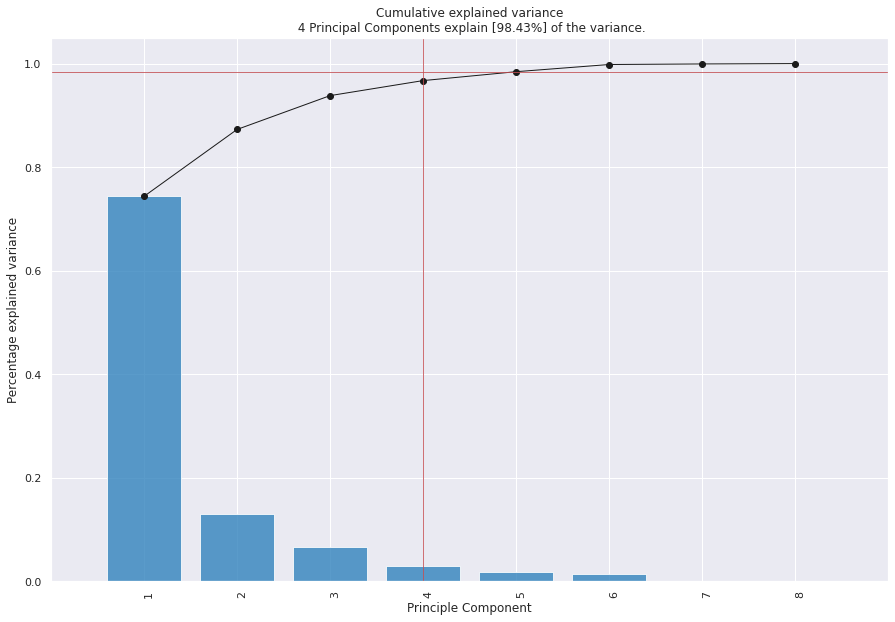

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


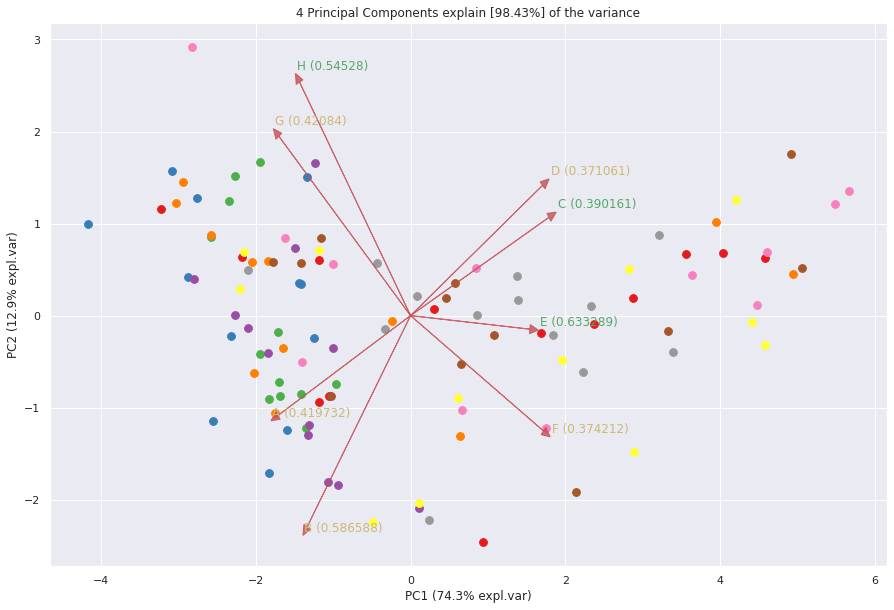

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3d0c15eaf0>)

In [36]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [110] unique colors! Available unique colors: [9].


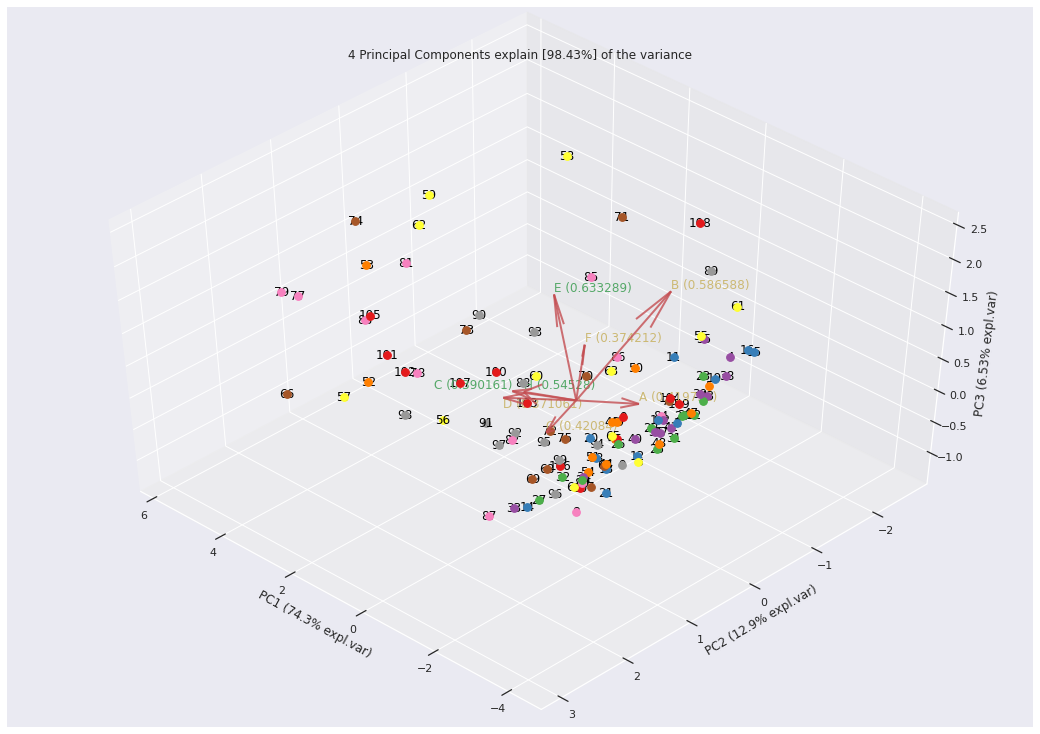

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f3d0ba17d60>)

In [37]:
model.biplot3d(legend=False)

# **Classification**

Using PyCaret

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (99, 9)
Unseen Data For Predictions: (11, 9)


**Setting up the Environment in PyCaret**



In [43]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (99, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (69, 8)
12                    Transformed Test Set           (30, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              150d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [49]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9286  0.9667  0.8917  0.9667   
knn                K Neighbors Classifier    0.9143  0.9292  0.8667  0.9750   
ada                  Ada Boost Classifier    0.9143  0.9375  0.9167  0.9467   
et                 Extra Trees Classifier    0.9143  0.9458  0.8667  0.9750   
gbc          Gradient Boosting Classifier    0.9119  0.9458  0.9167  0.9417   
ridge                    Ridge Classifier    0.9000  0.0000  0.8417  0.9750   
rf               Random Forest Classifier    0.9000  0.9208  0.8667  0.9600   
qda       Quadratic Discriminant Analysis    0.9000  0.9333  0.8667  0.9600   
nb                            Naive Bayes    0.8857  0.9250  0.8667  0.9350   
lda          Linear Discriminant Analysis    0.8857  0.9667  0.8167  0.9750   
dt               Decision Tree Classifier    0.8571  0.8583  0.8917  0.8683   
svm                   SVM - Linear Kernel    0.8571  0.0000  0.8083  0.9571   
lr                    Logistic Regression    0.8548  0.9250  0.8500  0.9017   
dummy                    Dummy Classifier    0.5214  0.5000  1.0000  0.5214   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9238  0.8577  0.8667     0.022  
knn       0.9038  0.8317  0.8528     0.039  
ada       0.9203  0.8195  0.8432     0.087  
et        0.9038  0.8317  0.8528     0.170  
gbc       0.9171  0.8166  0.8409     0.064  
ridge     0.8848  0.8059  0.8326     0.037  
rf        0.8931  0.8059  0.8326     0.213  
qda       0.8931  0.8059  0.8326     0.014  
nb        0.8824  0.7755  0.7992     0.049  
lda       0.8705  0.7779  0.8076     0.013  
dt        0.8681  0.7099  0.7352     0.013  
svm       0.8518  0.7034  0.7306     0.014  
lr        0.8560  0.7190  0.7469     0.090  
dummy     0.6830  0.0000  0.0000     0.010

INFO:logs:create_model_container: 57
INFO:logs:master_model_container: 57
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


**Create Decision Tree Classifier**

In [50]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

**Create Decision Tree Classifier**

In [51]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8571  0.8750  0.7500  1.0000  0.8571  0.7200  0.7500
3       0.7143  0.7083  0.7500  0.7500  0.7500  0.4167  0.4167
4       0.7143  0.6667  1.0000  0.6667  0.8000  0.3636  0.4714
5       0.8571  0.8750  0.7500  1.0000  0.8571  0.7200  0.7500
6       0.7143  0.7083  0.6667  0.6667  0.6667  0.4167  0.4167
7       0.7143  0.7500  1.0000  0.6000  0.7500  0.4615  0.5477
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8571  0.8583  0.8917  0.8683  0.8681  0.7099  0.7352
SD      0.1278  0.1320  0.1346  0.1647  0.1196  0.2628  0.2426

INFO:logs:create_model_container: 58
INFO:logs:master_model_container: 58
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [52]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune Decision Tree Model**

In [53]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.7143  0.7500  0.7500  0.750  0.7500  0.4167  0.4167
4       0.7143  0.7500  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.8750  0.7500  1.000  0.8571  0.7200  0.7500
6       0.8571  0.9167  0.6667  1.000  0.8000  0.6957  0.7303
7       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9143  0.9292  0.8667  0.975  0.9074  0.8294  0.8445
SD      0.1143  0.0987  0.1756  0.075  0.1218  0.2259  0.2093

INFO:logs:create_model_container: 59
INFO:logs:master_model_container: 59
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [54]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [55]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
evaluate_model(tuned_dt)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [57]:
knn = create_model('knn')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.8571  0.8333  0.7500  1.000  0.8571  0.7200  0.7500
4       0.7143  0.7917  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.8333  0.7500  1.000  0.8571  0.7200  0.7500
6       0.8571  0.8333  0.6667  1.000  0.8000  0.6957  0.7303
7       0.8571  1.0000  1.0000  0.750  0.8571  0.7200  0.7500
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9143  0.9292  0.8667  0.975  0.9038  0.8317  0.8528
SD      0.0948  0.0875  0.1756  0.075  0.1095  0.1829  0.1575

INFO:logs:create_model_container: 60
INFO:logs:master_model_container: 60
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [58]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.8571  0.8750  0.7500  1.000  0.8571  0.7200  0.7500
4       0.7143  0.7917  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.8333  0.7500  1.000  0.8571  0.7200  0.7500
6       0.8571  0.9583  0.6667  1.000  0.8000  0.6957  0.7303
7       0.8571  0.8750  1.0000  0.750  0.8571  0.7200  0.7500
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9143  0.9333  0.8667  0.975  0.9038  0.8317  0.8528
SD      0.0948  0.0773  0.1756  0.075  0.1095  0.1829  0.1575

INFO:logs:create_model_container: 61
INFO:logs:master_model_container: 61
INFO:logs:display_container: 10
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [59]:
evaluate_model(tuned_knn)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [60]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
2       0.8571  1.0000    0.75  1.0000  0.8571  0.7200  0.7500
3       0.5714  0.6667    0.50  0.6667  0.5714  0.1600  0.1667
4       0.7143  1.0000    0.50  1.0000  0.6667  0.4615  0.5477
5       0.8571  0.8333    0.75  1.0000  0.8571  0.7200  0.7500
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.7143  0.7500    1.00  0.6000  0.7500  0.4615  0.5477
8       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
9       0.8333  1.0000    1.00  0.7500  0.8571  0.6667  0.7071
Mean    0.8548  0.9250    0.85  0.9017  0.8560  0.7190  0.7469
SD      0.1430  0.1205    0.20  0.1539  0.1453  0.2763  0.2596

INFO:logs:create_model_container: 62
INFO:logs:master_model_container: 62
INFO:logs:display_container: 11
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [61]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.5714  0.6667  0.5000  0.6667  0.5714  0.1600  0.1667
4       0.7143  1.0000  0.5000  1.0000  0.6667  0.4615  0.5477
5       0.8571  0.8333  0.7500  1.0000  0.8571  0.7200  0.7500
6       0.8571  0.9167  1.0000  0.7500  0.8571  0.7200  0.7500
7       0.7143  0.7500  1.0000  0.6000  0.7500  0.4615  0.5477
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8714  0.9167  0.8750  0.9017  0.8702  0.7523  0.7762
SD      0.1491  0.1179  0.2016  0.1539  0.1516  0.2879  0.2698

INFO:logs:create_model_container: 63
INFO:logs:master_model_container: 63
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [62]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [63]:
rf = create_model('rf')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000   1.00  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000   1.00  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000   1.00  1.0000  1.0000  1.0000
3       0.8571  0.8333  0.7500   1.00  0.8571  0.7200  0.7500
4       0.7143  0.7500  0.5000   1.00  0.6667  0.4615  0.5477
5       0.8571  0.7917  0.7500   1.00  0.8571  0.7200  0.7500
6       0.8571  0.8333  0.6667   1.00  0.8000  0.6957  0.7303
7       0.7143  1.0000  1.0000   0.60  0.7500  0.4615  0.5477
8       1.0000  1.0000  1.0000   1.00  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000   1.00  1.0000  1.0000  1.0000
Mean    0.9000  0.9208  0.8667   0.96  0.8931  0.8059  0.8326
SD      0.1116  0.0994  0.1756   0.12  0.1184  0.2127  0.1807

INFO:logs:create_model_container: 64
INFO:logs:master_model_container: 64
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [64]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.7143  0.8333  0.7500  0.750  0.7500  0.4167  0.4167
4       0.7143  0.7917  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.7917  0.7500  1.000  0.8571  0.7200  0.7500
6       0.8571  0.9167  0.6667  1.000  0.8000  0.6957  0.7303
7       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9143  0.9333  0.8667  0.975  0.9074  0.8294  0.8445
SD      0.1143  0.0878  0.1756  0.075  0.1218  0.2259  0.2093

INFO:logs:create_model_container: 65
INFO:logs:master_model_container: 65
INFO:logs:display_container: 14
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [66]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
3       0.7143  0.8333  0.5000    1.0  0.6667  0.4615  0.5477
4       0.7143  0.8333  0.5000    1.0  0.6667  0.4615  0.5477
5       0.8571  0.8750  0.7500    1.0  0.8571  0.7200  0.7500
6       0.8571  0.9167  0.6667    1.0  0.8000  0.6957  0.7303
7       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
Mean    0.9143  0.9458  0.8417    1.0  0.8990  0.8339  0.8576
SD      0.1143  0.0698  0.2056    0.0  0.1344  0.2179  0.1848

INFO:logs:create_model_container: 66
INFO:logs:master_model_container: 66
INFO:logs:display_container: 15
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [68]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

In [69]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [70]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (99, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (69, 3)
12                    Transformed Test Set           (30, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              725a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [71]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.9286  0.9333  0.9000  0.9750   
lr                    Logistic Regression    0.9143  0.9500  0.8667  0.9750   
knn                K Neighbors Classifier    0.9000  0.8917  0.8333  0.9750   
lightgbm  Light Gradient Boosting Machine    0.9000  0.9250  0.8417  0.9750   
ridge                    Ridge Classifier    0.8857  0.0000  0.8333  0.9600   
lda          Linear Discriminant Analysis    0.8857  0.9333  0.8333  0.9600   
nb                            Naive Bayes    0.8833  0.9417  0.8667  0.9350   
rf               Random Forest Classifier    0.8714  0.8917  0.8667  0.9150   
et                 Extra Trees Classifier    0.8571  0.8917  0.8333  0.8800   
svm                   SVM - Linear Kernel    0.8548  0.0000  0.7833  0.9500   
ada                  Ada Boost Classifier    0.8286  0.9125  0.8667  0.8400   
gbc          Gradient Boosting Classifier    0.8286  0.9083  0.8333  0.8450   
dt               Decision Tree Classifier    0.8000  0.8000  0.8000  0.8117   
dummy                    Dummy Classifier    0.5214  0.5000  1.0000  0.5214   

              F1   Kappa     MCC  TT (Sec)  
qda       0.9238  0.8622  0.8798     0.014  
lr        0.9038  0.8317  0.8528     0.017  
knn       0.8738  0.7985  0.8269     0.020  
lightgbm  0.8848  0.8059  0.8326     0.022  
ridge     0.8631  0.7727  0.8067     0.012  
lda       0.8631  0.7727  0.8067     0.013  
nb        0.8788  0.7725  0.8033     0.016  
rf        0.8713  0.7451  0.7723     0.203  
et        0.8420  0.7101  0.7286     0.177  
svm       0.8262  0.7113  0.7524     0.013  
ada       0.8341  0.6635  0.6909     0.086  
gbc       0.8166  0.6561  0.6897     0.062  
dt        0.7868  0.5955  0.6231     0.013  
dummy     0.6830  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [72]:
best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [73]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.8571  0.7500  0.7500  1.000  0.8571  0.7200  0.7500
4       0.7143  0.8333  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.8333  0.7500  1.000  0.8571  0.7200  0.7500
6       0.8571  1.0000  0.6667  1.000  0.8000  0.6957  0.7303
7       0.8571  0.9167  1.0000  0.750  0.8571  0.7200  0.7500
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9143  0.9333  0.8667  0.975  0.9038  0.8317  0.8528
SD      0.0948  0.0898  0.1756  0.075  0.1095  0.1829  0.1575

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [74]:
tuned_best_model_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

In [75]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapley values**

In [76]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [79]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import shap

In [81]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  1.0000  1.0000  0.8000  0.8889  0.6957  0.7303
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8571  0.7500  0.7500  1.0000  0.8571  0.7200  0.7500
4       0.7143  0.5000  0.5000  1.0000  0.6667  0.4615  0.5477
5       0.7143  0.7500  0.7500  0.7500  0.7500  0.4167  0.4167
6       0.8571  0.9167  0.6667  1.0000  0.8000  0.6957  0.7303
7       0.7143  1.0000  1.0000  0.6000  0.7500  0.4615  0.5477
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8714  0.8917  0.8667  0.9150  0.8713  0.7451  0.7723
SD      0.1187  0.1627  0.1756  0.1379  0.1196  0.2311  0.2095

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [82]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       0.8571  0.8750  0.7500  1.000  0.8571  0.7200  0.7500
4       0.7143  0.7500  0.5000  1.000  0.6667  0.4615  0.5477
5       0.8571  0.8750  0.7500  1.000  0.8571  0.7200  0.7500
6       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
7       0.8571  0.8750  1.0000  0.750  0.8571  0.7200  0.7500
8       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
Mean    0.9286  0.9375  0.9000  0.975  0.9238  0.8622  0.8798
SD      0.0958  0.0839  0.1658  0.075  0.1069  0.1831  0.1573

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


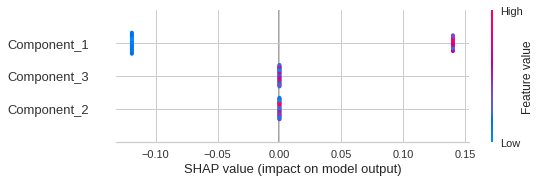

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [83]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [90]:
interpret_model(tuned_rf_pca, plot='reason', observation=3)


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=3, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**

In [91]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
